#ALY6020_Module_1_Project Vaibhav Arora

#Importing Libraries

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#Importing Dataset

In [104]:
#reading csv file
url = 'https://raw.githubusercontent.com/vaib2443/ALY6020_1/main/adult-all.csv'
df = pd.read_csv(url)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#Renaming Columns and Resetting Index

In [105]:
df.loc[-1] = df.columns.values
df.sort_index(inplace=True)
df.reset_index(drop=True, inplace=True)

df.rename(columns=
    {"39": "age", "State-gov": "workingclass", "77516": "fnlwgt", "Bachelors": "education", "13": "education-num","Never-married":"marital-status",
     "Adm-clerical":"occupation","Not-in-family":"relationship","White":"race","Male":"gender","2174":"gain","0":"loss","40":"week-hours",
     "United-States":"country","<=50K":"salary"}, 
    inplace=True)
df.head()

,age,workingclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,gain,loss,week-hours,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workingclass    48842 non-null  object
 2   fnlwgt          48842 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  object
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  gain            48842 non-null  object
 11  loss            48842 non-null  object
 12  week-hours      48842 non-null  object
 13  country         48842 non-null  object
 14  salary          48842 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB


In [107]:
df.isnull().sum()

age               0
workingclass      0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
gain              0
loss              0
week-hours        0
country           0
salary            0
dtype: int64

#Converting to respective datatypes

In [108]:
df[['age', 'education-num','gain','loss','week-hours', 'fnlwgt']] = df[['age', 'education-num','gain','loss','week-hours', 'fnlwgt']].astype(int)
df.dtypes

age                int64
workingclass      object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
gain               int64
loss               int64
week-hours         int64
country           object
salary            object
dtype: object

In [109]:
df.shape

(48842, 15)

#Addressing '?' Values

In [110]:
df['workingclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workingclass, dtype: int64

In [111]:
data=df.replace('?', np.nan)
data.isnull().sum()

age                  0
workingclass      2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
gain                 0
loss                 0
week-hours           0
country            857
salary               0
dtype: int64

In [112]:
df["workingclass"].value_counts(normalize=True)



Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workingclass, dtype: float64

In [113]:
df["occupation"].value_counts(normalize=True)


Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
Other-service        0.100794
Machine-op-inspct    0.061873
?                    0.057512
Transport-moving     0.048217
Handlers-cleaners    0.042423
Farming-fishing      0.030507
Tech-support         0.029606
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: occupation, dtype: float64

In [114]:
df["country"].value_counts(normalize=True)


United-States                 0.897424
Mexico                        0.019471
?                             0.017546
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran                          0.001208
Greece                   

In [115]:
#df = data.dropna(how='any',axis=0) 
#df.shape
df=data

#Replacing '?' Values by Mode in Workring Class and Country. By Unknown Value in Occupation


In [116]:
df["workingclass"] = df["workingclass"].fillna("Private")
df["occupation"] = df["occupation"].fillna("unknown")
df["country"] = df["country"].fillna("United-States")

In [117]:
df.isnull().sum()

age               0
workingclass      0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
gain              0
loss              0
week-hours        0
country           0
salary            0
dtype: int64

In [118]:
df.shape

(48842, 15)

#Exploratory Data Analysis

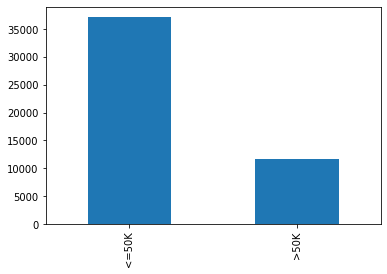

In [119]:
df.salary.value_counts().plot(kind='bar')
plt.show()

In [120]:
df['salary'].value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: salary, dtype: float64

In [121]:
df.describe()


,age,fnlwgt,education-num,gain,loss,week-hours
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [122]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [123]:
df_int = df.select_dtypes(include = ['int64'])
df_int.head()

,age,fnlwgt,education-num,gain,loss,week-hours
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [124]:
df_cat = df.select_dtypes(include = ['O'])
df_cat.head()

,workingclass,education,marital-status,occupation,relationship,race,gender,country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


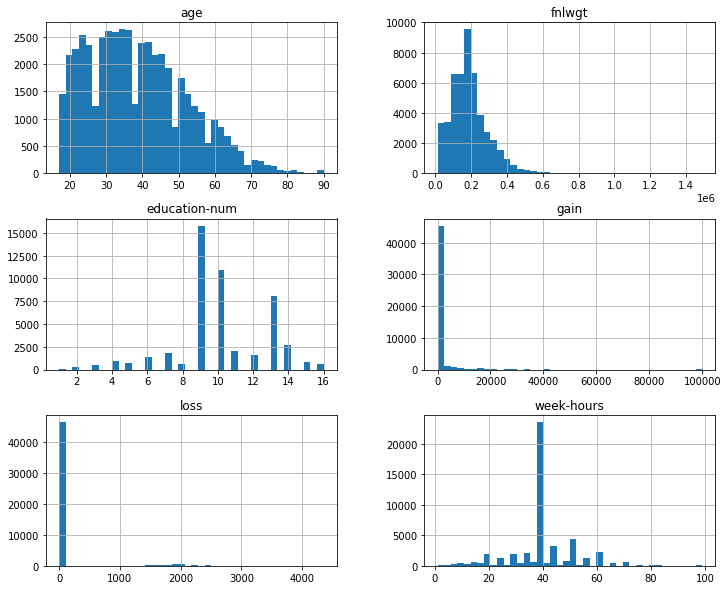

In [125]:
df_int.hist(figsize=(12, 10), bins=40);

[]

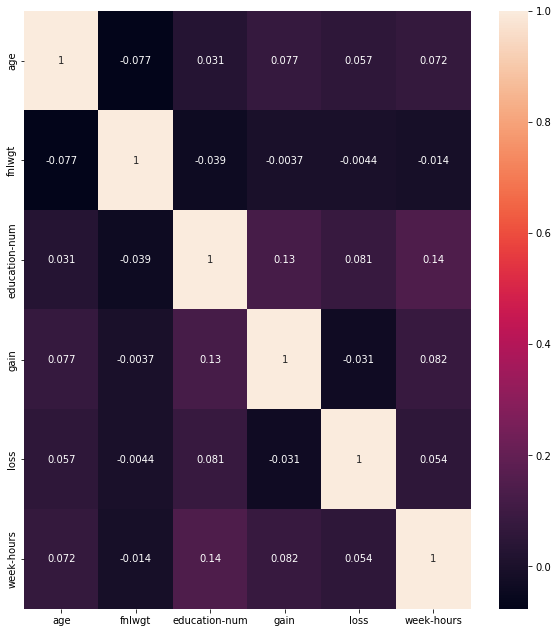

In [126]:
plt.figure(figsize=(10,11))
sns.heatmap(df_int.corr(),annot=True)
plt.plot()

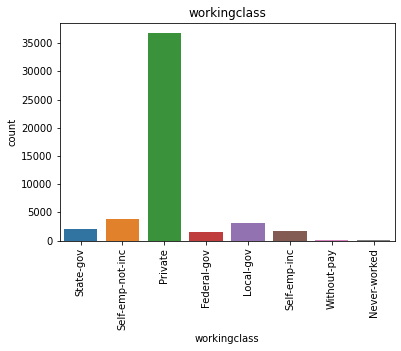

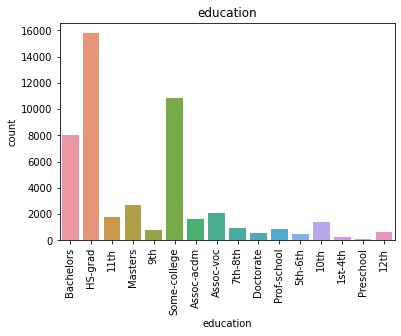

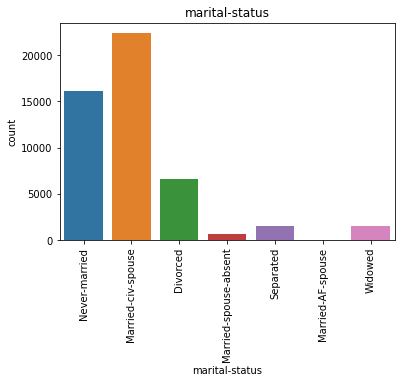

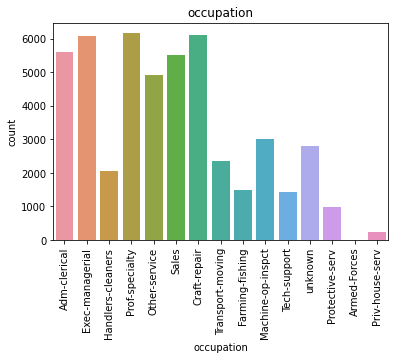

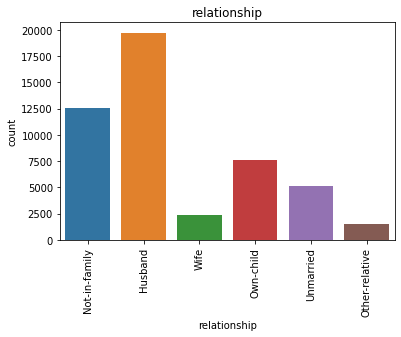

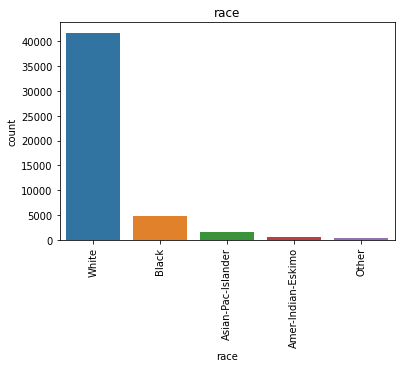

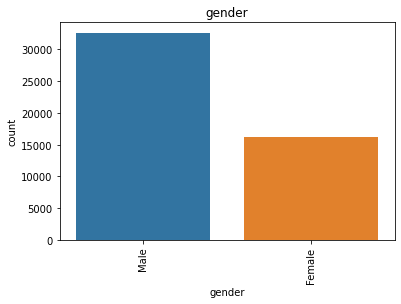

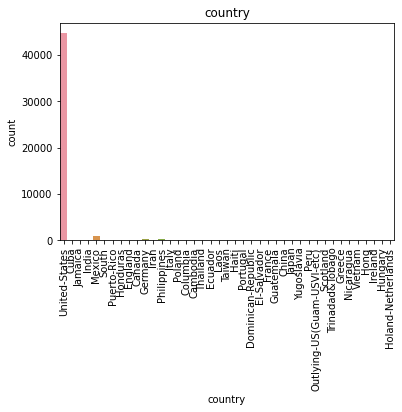

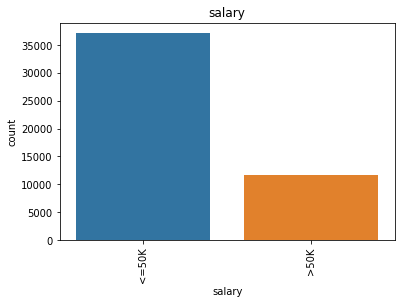

In [127]:
for i in df_cat:
    sns.countplot(x = df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

#Feature Engineering

In [128]:
df["marital-status"] = df["marital-status"].replace(['Never-married','Divorced','Widowed','Separated'], 'Unmarried')
df["marital-status"] = df["marital-status"].replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'], 'Married')
df["marital-status"].value_counts(normalize=True)

Unmarried    0.528193
Married      0.471807
Name: marital-status, dtype: float64

In [129]:
df["workingclass"] = df["workingclass"].replace(['State-gov','Federal-gov','Without-pay','Self-emp-inc','Never-worked'], 'Other')
df["workingclass"].value_counts(normalize=True)

Private             0.751505
Other               0.105217
Self-emp-not-inc    0.079071
Local-gov           0.064207
Name: workingclass, dtype: float64

In [130]:
df["education"] = df["education"].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','12th','10th','Prof-school','11th'], 'school')
df["education"].value_counts(normalize=True)

HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
school          0.148274
Masters         0.054400
Assoc-voc       0.042197
Assoc-acdm      0.032779
Doctorate       0.012162
Name: education, dtype: float64

In [131]:
df["occupation"] = df["occupation"].replace(['unknown','Handlers-cleaners','Farming-fishing','Tech-support','Armed-Forces','Transport-moving','Protective-serv','Priv-house-serv'], 'other')
df["occupation"].value_counts(normalize=True)

other                0.233651
Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
Other-service        0.100794
Machine-op-inspct    0.061873
Name: occupation, dtype: float64

In [132]:
df["race"] = df["race"].replace(['Amer-Indian-Eskimo','Other'], 'other')
df["race"].value_counts(normalize=True)

White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
other                 0.017935
Name: race, dtype: float64

In [133]:
df["country"] = df["country"].replace(['Philippines', 'Germany','Greece','Vietnam', 'Taiwan', 'India','China', 
                                       'Trinadad&Tobago', 'South', 'Honduras','Holand-Netherlands','Canada', 'Puerto-Rico', 
                                       'Cuba','Ireland', 'Peru', 'Cambodia', 'Nicaragua', 'Dominican-Republic','Haiti', 
                                       'El-Salvador', 'Guatemala','Jamaica','Iran', 'Ecuador','Columbia', 'Hong','France', 'Hungary',
                                       'Yugoslavia', 'Scotland','Portugal', 'Thailand', 'Laos','England','Italy',
                                       'Outlying-US(Guam-USVI-etc)','Japan','Poland'], 'other')

df["country"].value_counts(normalize=True)


United-States    0.914971
other            0.065558
Mexico           0.019471
Name: country, dtype: float64

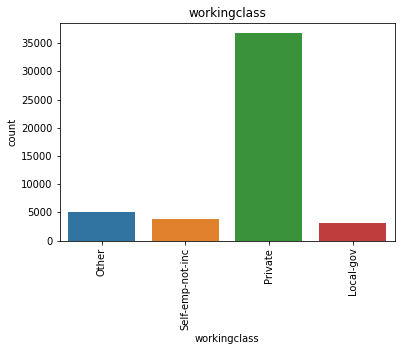

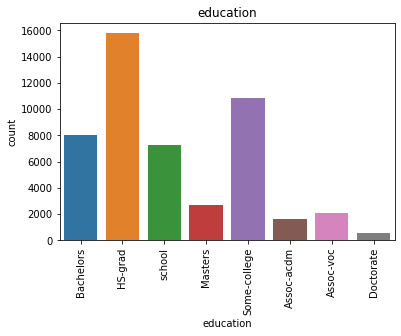

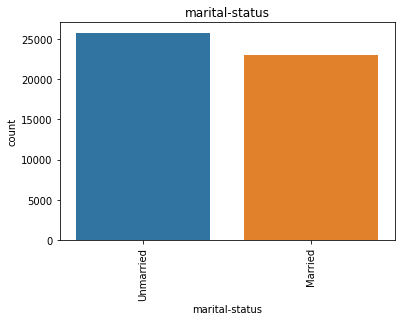

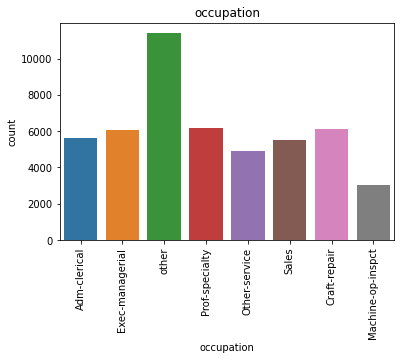

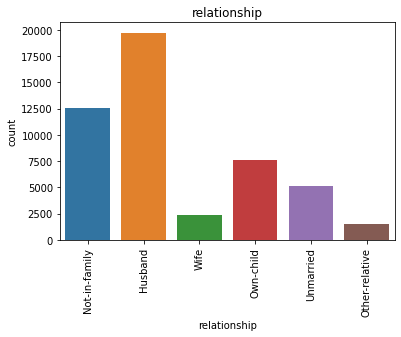

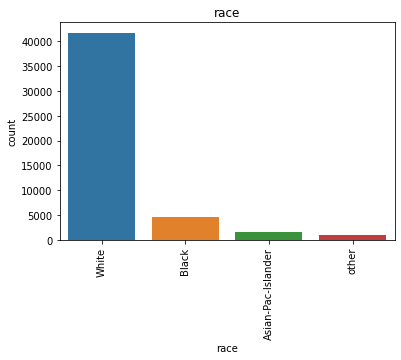

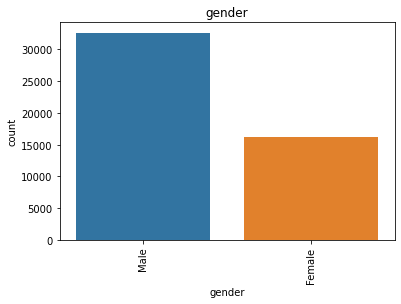

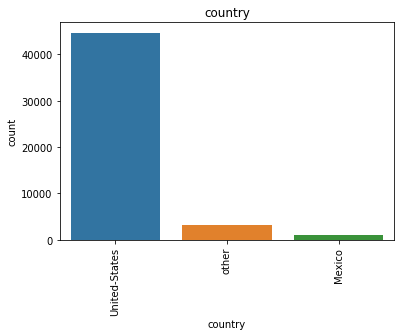

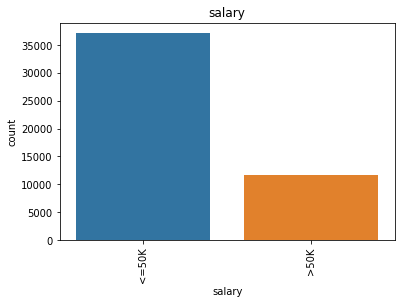

In [134]:
df_cat2 = df.select_dtypes(include = ['O'])
for i in df_cat2:
    sns.countplot(x = df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

#Data Pre Processing

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workingclass    48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  gain            48842 non-null  int64 
 11  loss            48842 non-null  int64 
 12  week-hours      48842 non-null  int64 
 13  country         48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#Dropping Columns that are not needed

In [136]:
df.drop(['fnlwgt', 'education-num'], axis = 1, inplace = True)


#Converting to Binary Variables




In [137]:
#gender
df["gender"] = df["gender"].map({"Male": 0, "Female":1})

In [138]:
#marital-status
df["marital-status"] = df["marital-status"].map({"Unmarried":0, "Married":1})

In [139]:
#salary
df["salary"] = df["salary"].apply(lambda x:1 if x == ">50K" else 0)



In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workingclass    48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  int64 
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   gender          48842 non-null  int64 
 8   gain            48842 non-null  int64 
 9   loss            48842 non-null  int64 
 10  week-hours      48842 non-null  int64 
 11  country         48842 non-null  object
 12  salary          48842 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 4.8+ MB


##Splitting Independent and Dependent variables

In [141]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [142]:
x

,age,workingclass,education,marital-status,occupation,relationship,race,gender,gain,loss,week-hours,country
0,39,Other,Bachelors,0,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,1,Exec-managerial,Husband,White,0,0,0,13,United-States
2,38,Private,HS-grad,0,other,Not-in-family,White,0,0,0,40,United-States
3,53,Private,school,1,other,Husband,Black,0,0,0,40,United-States
4,28,Private,Bachelors,1,Prof-specialty,Wife,Black,1,0,0,40,other
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,0,Prof-specialty,Not-in-family,White,1,0,0,36,United-States
48838,64,Private,HS-grad,0,other,Other-relative,Black,0,0,0,40,United-States
48839,38,Private,Bachelors,1,Prof-specialty,Husband,White,0,0,0,50,United-States
48840,44,Private,Bachelors,0,Adm-clerical,Own-child,Asian-Pac-Islander,0,5455,0,40,United-States


In [143]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: salary, Length: 48842, dtype: int64

#Train-Test Split

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [145]:
x_train.head()

,age,workingclass,education,marital-status,occupation,relationship,race,gender,gain,loss,week-hours,country
26051,19,Private,Some-college,0,other,Own-child,White,0,0,0,15,United-States
47048,31,Private,HS-grad,1,Craft-repair,Husband,White,0,0,0,40,United-States
33914,34,Private,HS-grad,0,Craft-repair,Not-in-family,White,0,0,0,40,United-States
22131,49,Self-emp-not-inc,Assoc-acdm,0,Exec-managerial,Not-in-family,White,0,0,0,25,United-States
46451,38,Self-emp-not-inc,school,1,other,Husband,White,0,0,0,45,United-States


#Label Encoding For Categorical Variables

In [146]:
from sklearn import preprocessing

cat_var = ['workingclass','education', 'marital-status', 'occupation', 'relationship','race', 'gender','country']
for feat in cat_var:
        le = preprocessing.LabelEncoder()
        x_train[feat] = le.fit_transform(x_train[feat])
        x_test[feat] = le.transform(x_test[feat])

#Feature Scaling

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#KNN Model with multiple K Values

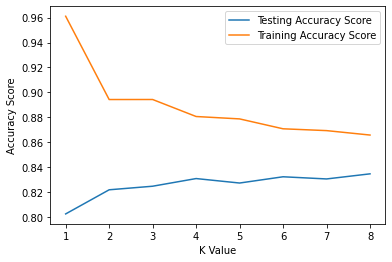

In [148]:
from sklearn.neighbors import KNeighborsClassifier
nn = np.arange(1, 9)
train_acc = np.empty(len(nn))
test_acc = np.empty(len(nn))
  
# Loop to find optimal K values
for i, k in enumerate(nn):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Computing training and test data
    train_acc[i] = knn.score(x_train, y_train)
    test_acc[i] = knn.score(x_test, y_test)
  
# Creating plot
plt.plot(nn, test_acc, label = 'Testing Accuracy Score')
plt.plot(nn, train_acc, label = 'Training Accuracy Score')
  
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.show()

#kNN Model with k value of 7

In [149]:
k7 = KNeighborsClassifier(n_neighbors = 7)
k7.fit(x_train, y_train)
y_pred_7 = k7.predict(x_test)


#Accuracy Score


In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy Score with k=7", accuracy_score(y_test, y_pred_7)*100)


Accuracy Score with k=7 83.05865492885658


#Confusion Matrix

In [151]:
cm = confusion_matrix(y_test, y_pred_7)
print(cm)

[[6752  678]
 [ 977 1362]]
